# Support Vector Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [58]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

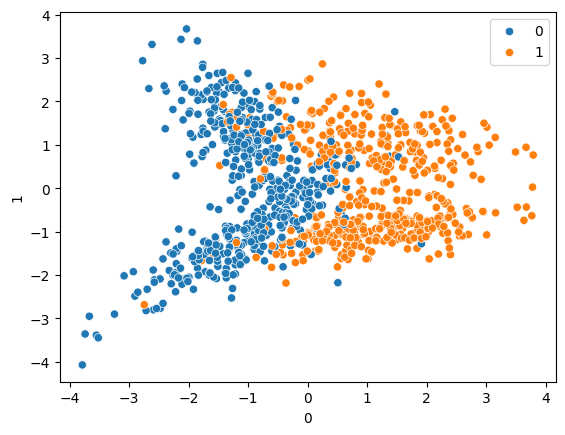

In [59]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [61]:
from sklearn.svm import SVC

In [62]:
svc=SVC(kernel="linear")

In [63]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [64]:
y_pred=svc.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       127
           1       0.86      0.85      0.86       123

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

[[110  17]
 [ 18 105]]


In [66]:
rbf=SVC(kernel="rbf")

In [67]:
rbf.fit(X_train,y_train)

SVC()

In [70]:
y_pred1=rbf.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       127
           1       0.92      0.88      0.90       123

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[117  10]
 [ 15 108]]


In [72]:
polynomial=SVC(kernel="poly")
polynomial.fit(X_train,y_train)
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       127
           1       0.77      0.85      0.81       123

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250

[[ 95  32]
 [ 18 105]]


In [73]:
sigmoid=SVC(kernel="sigmoid")
sigmoid.fit(X_train,y_train)
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       127
           1       0.78      0.83      0.81       123

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250

[[ 99  28]
 [ 21 102]]


In [85]:
sigmoid.intercept_

array([-0.08586934])

## Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
            'gamma': [1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','linear','poly','signmoid']}

In [79]:
svc=SVC()
grid=GridSearchCV(estimator=svc,param_grid=param_grid,cv=5,verbose=3,refit=True)

In [80]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.853 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.820 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.867 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

c:\Kashyap\anacond3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Kashyap\anacond3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Kashyap\anacond3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Kashyap\anacond3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Kashyap\anacond3\Lib\site-packages\sklearn\utils\_param_v

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'signmoid']},
             verbose=3)

In [81]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [82]:
grid.best_score_

0.9133333333333333

In [83]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       127
           1       0.89      0.90      0.90       123

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[113  14]
 [ 12 111]]
